In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop

In [6]:
(mnist_train_images,mnist_train_labels),(mnist_test_images,mnist_test_labels)=mnist.load_data()

In [7]:
train_images=mnist_train_images.reshape(60000,784)
test_images=mnist_test_images.reshape(10000,784)
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
train_images /=255     
test_images /=255
#divide the image data by 255 in order to normalize it into 0-1 range, after converting it into floating point values.

In [8]:
#convert the 0-9 labels into "one-hot" format,
train_labels=keras.utils.to_categorical(mnist_train_labels,10)
test_labels=keras.utils.to_categorical(mnist_test_labels,10)

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


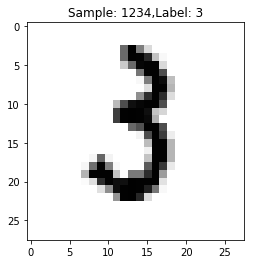

In [10]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])
    #Print the label converted back to a number
    label=train_labels[num].argmax(axis=0)
    #Reshape the 784 values to a 28x28 image
    image=train_images[num].reshape(28,28)
    plt.title('Sample: %d,Label: %d' % (num,label))
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)
    

In [21]:
#adding dropout layers to prevent overfitting
#add dense layer of 512 hidden neurons taking 784 features and then we are gonna dropout 20% of the neuron's thinnest layer to force 
#the learning to be spread out more and prevent overfitting

model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [24]:
history=model.fit(train_images,train_labels,batch_size=100,epochs=10,verbose=2,validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 60s - loss: 0.2389 - acc: 0.9260 - val_loss: 0.1139 - val_acc: 0.9650
Epoch 2/10
 - 16s - loss: 0.1030 - acc: 0.9696 - val_loss: 0.0866 - val_acc: 0.9749
Epoch 3/10
 - 16s - loss: 0.0768 - acc: 0.9768 - val_loss: 0.0738 - val_acc: 0.9787
Epoch 4/10
 - 17s - loss: 0.0621 - acc: 0.9815 - val_loss: 0.0880 - val_acc: 0.9800
Epoch 5/10
 - 17s - loss: 0.0553 - acc: 0.9842 - val_loss: 0.0778 - val_acc: 0.9811
Epoch 6/10
 - 16s - loss: 0.0489 - acc: 0.9860 - val_loss: 0.0893 - val_acc: 0.9795
Epoch 7/10
 - 16s - loss: 0.0438 - acc: 0.9881 - val_loss: 0.0858 - val_acc: 0.9815
Epoch 8/10
 - 16s - loss: 0.0389 - acc: 0.9891 - val_loss: 0.0858 - val_acc: 0.9826
Epoch 9/10
 - 16s - loss: 0.0385 - acc: 0.9895 - val_loss: 0.1003 - val_acc: 0.9806
Epoch 10/10
 - 16s - loss: 0.0339 - acc: 0.9909 - val_loss: 0.0916 - val_acc: 0.9822


In [25]:
score=model.evaluate(test_images,test_labels,verbose=0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])

Test loss:  0.0916378518228
Test accuracy:  0.9822


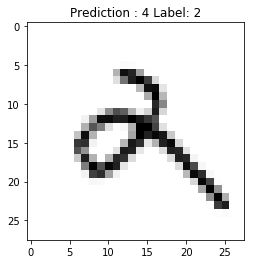

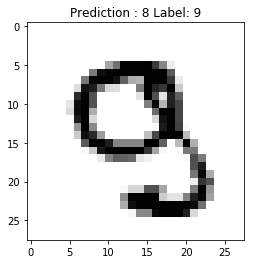

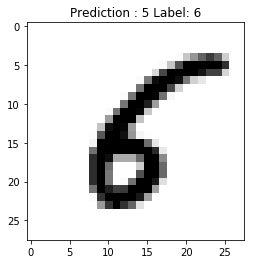

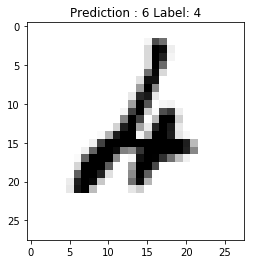

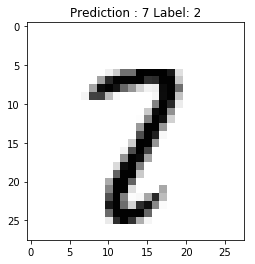

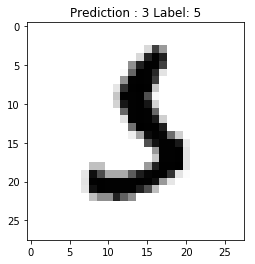

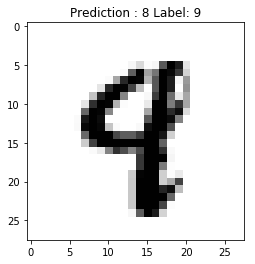

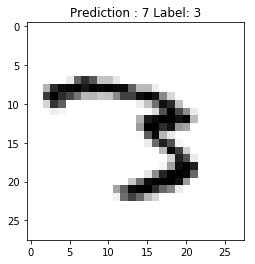

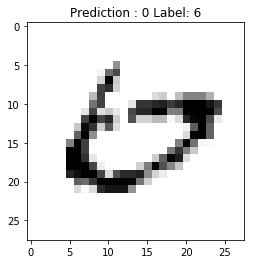

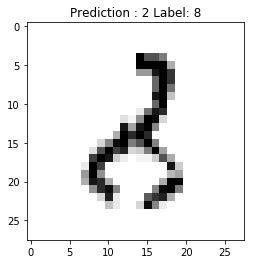

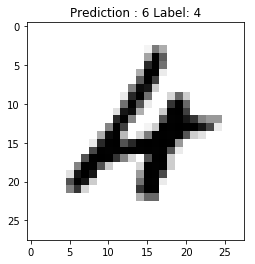

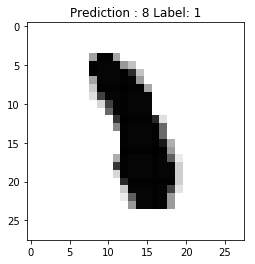

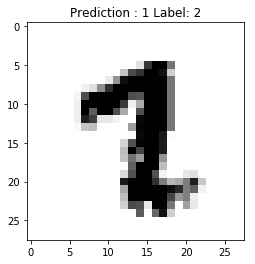

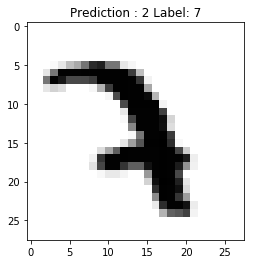

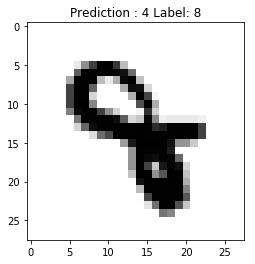

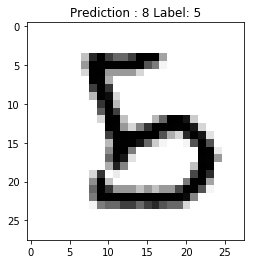

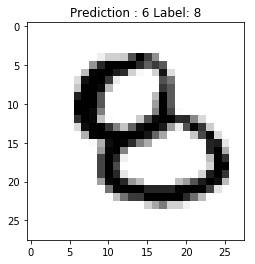

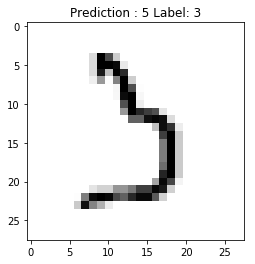

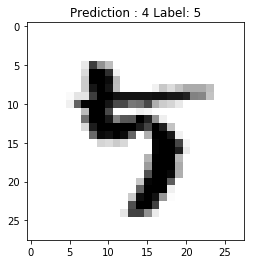

In [27]:
for x in range(1000):
    test_image=test_images[x,:].reshape(1,784)
    predicted_cat=model.predict(test_image).argmax()
    label=test_labels[x].argmax()
    if(predicted_cat!=label):
        plt.title('Prediction : %d Label: %d' %(predicted_cat,label))
        plt.imshow(test_image.reshape([28,28]),cmap=plt.get_cmap('gray_r'))
        plt.show()
    